# 1. Importando bibliotecas

In [32]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import glob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem import RSLPStemmer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /Users/andre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/andre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /Users/andre/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

# 2. Lendo dados

In [33]:
path = "../data/tweet_iteracoes/"

csv_files = glob.glob(path + "/*.csv")

math_patter = r'/tweet_iteracoes/(\d+)_\d{4}-\d{2}-\d{2}'

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file).assign(post_id=re.search(math_patter, file).group(1)) for file in csv_files)

# Concatenate all DataFrames
df_tweets_iteractions   = pd.concat(df_list, ignore_index=True)
df_tweets_iteractions['post_id']=df_tweets_iteractions['post_id'].astype(int)

In [34]:
df_tweets_iteractions.shape

(288, 4)

In [35]:
df_tweets_iteractions.head()

,full_text,created_at,id,post_id
0,@LoiraNoob Maravilhosas ❤️\nQuando eu tive jun...,2023-04-09 15:56:19+00:00,1645093289551331332,1643361688639471617
1,"@BRKsEDU Vi assim q saiu, excelente vídeo edu,...",2023-04-07 19:30:27+00:00,1644422403693375506,1644096545598455812
2,@BRKsEDU Curtindo muito esses seus vídeos dos ...,2023-04-07 01:38:58+00:00,1644152755777417217,1644096545598455812
3,@BRKsEDU Edu no dia 04/04 fui vítima de um gol...,2023-04-06 22:30:07+00:00,1644105231456673795,1644096545598455812
4,"@BRKsEDU Compra pra mim,eu sou pobre e a taxa ...",2023-04-06 22:21:01+00:00,1644102941941309441,1644096545598455812


In [36]:
path = "../data/influencer_tweets/"

csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df_influencer_tweets   = pd.concat(df_list, ignore_index=True).drop_duplicates().drop_duplicates(subset=['id'])
df_influencer_tweets['post_id'] = df_influencer_tweets['id']

In [37]:
df_tweets_iteractions.dtypes

full_text     object
created_at    object
id             int64
post_id        int64
dtype: object

In [38]:
df = df_tweets_iteractions.merge(df_influencer_tweets, on=['post_id'], how='left')

In [39]:
df.shape[0]==df_tweets_iteractions.shape[0]
# verifica se o left esta ok

True

In [40]:
df.tail()

,full_text_x,created_at_x,id_x,post_id,id_y,userID,created_at_y,full_text_y,favorite_count,retweet_count
283,@LoiraNoob Au au kkkkkkkkk boraaaaa,2023-04-17 21:43:54+00:00,1648079864560250882,1648079298518036481,1648079298518036481,Loiranoob,2023-04-17 21:41:39+00:00,VOCÊS QUEREM? ENTÃO TOMEM! https://t.co/ev8zxw...,1069,28
284,@LoiraNoob Au auuuu,2023-04-17 21:43:48+00:00,1648079842296864768,1648079298518036481,1648079298518036481,Loiranoob,2023-04-17 21:41:39+00:00,VOCÊS QUEREM? ENTÃO TOMEM! https://t.co/ev8zxw...,1069,28
285,@LoiraNoob MEU DEEEEUS,2023-04-17 21:43:48+00:00,1648079841122480132,1648079298518036481,1648079298518036481,Loiranoob,2023-04-17 21:41:39+00:00,VOCÊS QUEREM? ENTÃO TOMEM! https://t.co/ev8zxw...,1069,28
286,"@LoiraNoob Au au, pra vc tb",2023-04-17 21:43:47+00:00,1648079837599236097,1648079298518036481,1648079298518036481,Loiranoob,2023-04-17 21:41:39+00:00,VOCÊS QUEREM? ENTÃO TOMEM! https://t.co/ev8zxw...,1069,28
287,"@LoiraNoob ""de dinheirow money eu nao preciso""",2023-04-17 21:42:50+00:00,1648079595864727553,1648079298518036481,1648079298518036481,Loiranoob,2023-04-17 21:41:39+00:00,VOCÊS QUEREM? ENTÃO TOMEM! https://t.co/ev8zxw...,1069,28


In [42]:
# Definir a lista de stopwords em português
stop_words = set(stopwords.words('portuguese'))


# Definir o stemmer e o lemmatizer para o idioma português
stemmer = SnowballStemmer('portuguese')
lemmatizer = WordNetLemmatizer()

# Tokenizar o texto e aplicar a limpeza
def preprocess_text(text):
    # Tokenizar o texto
    tokens = word_tokenize(text.lower(), language='portuguese')

    # Remover stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Realizar stemming
    tokens = [stemmer.stem(token) for token in tokens]

    # Realizar lematização
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Juntar os tokens em uma única string
    clean_text = ' '.join(tokens)

    return clean_text

# Aplicar a limpeza em cada texto da coluna 'full_text'
df['clean_text'] = df['full_text_x'].apply(preprocess_text)

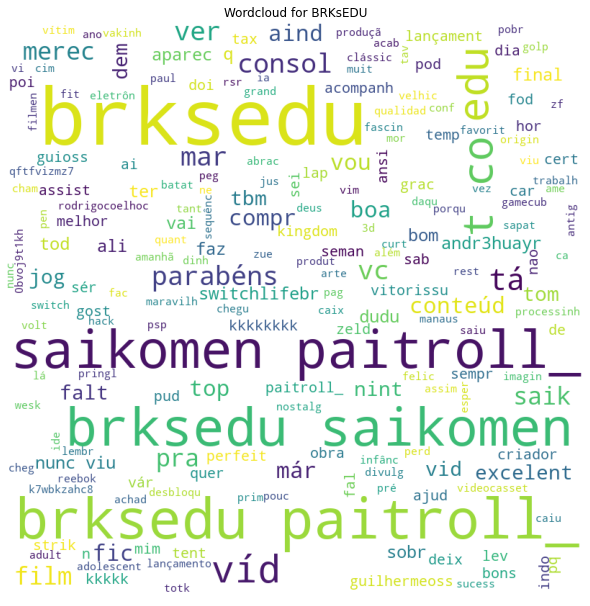

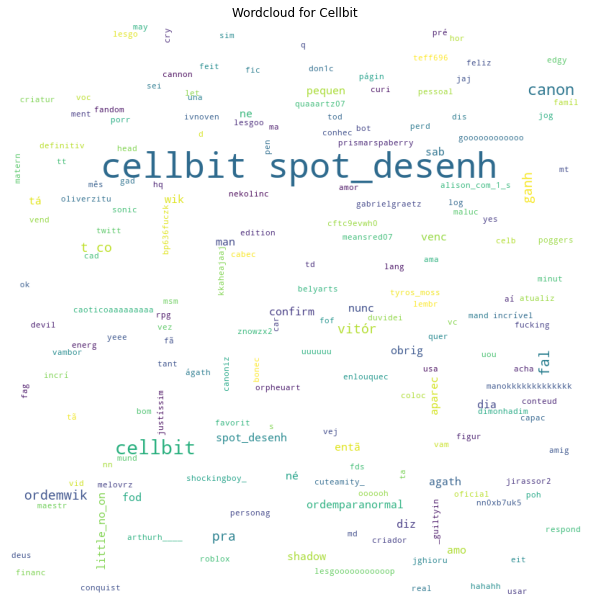

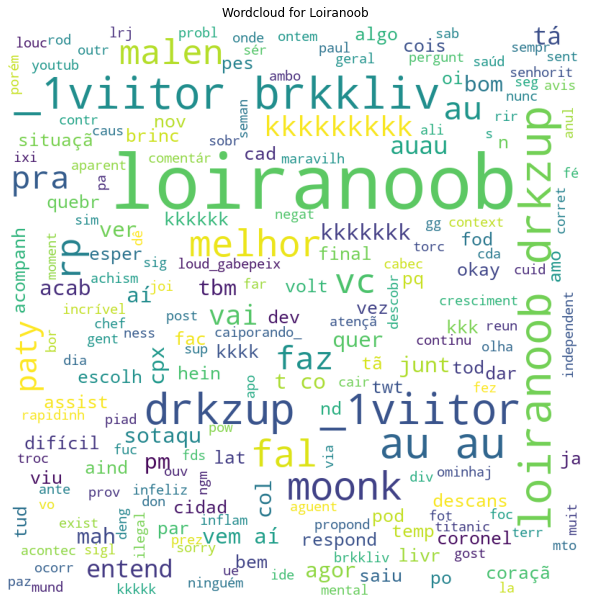

In [43]:
grouped_data = df.groupby('userID')

for group_name, group in grouped_data:
    text = ' '.join(group['clean_text'].tolist())
    preprocessed_text = preprocess_text(text)
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(preprocessed_text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Wordcloud for {group_name}")
    plt.show()

In [47]:
def get_top_words(group_text, n=10, min_length=4):
    # Tokenize the text
    tokens = word_tokenize(group_text)
    
    # Remove stopwords
    stopwords_list = stopwords.words('portuguese')
    tokens = [token for token in tokens if token not in stopwords_list]
    
    # Lemmatize the tokens
    stemmer = RSLPStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Filter out words with length less than min_length
    tokens = [token for token in tokens if len(token) >= min_length]
    
    # Count the frequency of each word
    word_freq = nltk.FreqDist(tokens)
    
    # Get the n most common words
    top_words = word_freq.most_common(n)
    
    return top_words


grouped_data = df.groupby('userID')

for group_name, group in grouped_data:
    text = ' '.join(group['clean_text'].tolist())
    preprocessed_text = preprocess_text(text)
    top_words = get_top_words(preprocessed_text, n=10)
    print(f"10 palavras mais utilizadas pelos seguidoers de {group_name}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")
    print("=====")

10 palavras mais utilizadas pelos seguidoers de BRKsEDU:
brksedu: 117
paitroll_: 68
saikomen: 31
http: 18
consol: 7
parabém: 7
film: 6
saik: 6
merec: 6
compr: 5
=====
10 palavras mais utilizadas pelos seguidoers de Cellbit:
cellbit: 80
spot_desenh: 74
canon: 5
ganh: 3
vitór: 3
ordemwik: 3
http: 3
little_no_on: 2
ordemparanorm: 2
pequen: 2
=====
10 palavras mais utilizadas pelos seguidoers de Loiranoob:
loiranoob: 95
brkkliv: 14
drkzup: 13
_1vii: 13
moonk: 10
melhor: 9
malen: 8
paty: 6
kkkkkkkkk: 5
entend: 4
=====
